In [1]:
import pandas as pd
from matplotlib import cm
import numpy as np
from math import floor, ceil
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from Preprocess import *
from plot import *
markers=['.','+','x','_',',','|','1','2','3','4','8','>','<']
cmap1 = plt.cm.RdBu
cmap2 = plt.cm.Set2
cmap3 = plt.cm.tab20c
# cmap3 = plt.cm.hot
C =ListedColormap (np.random.rand (20,3)).colors

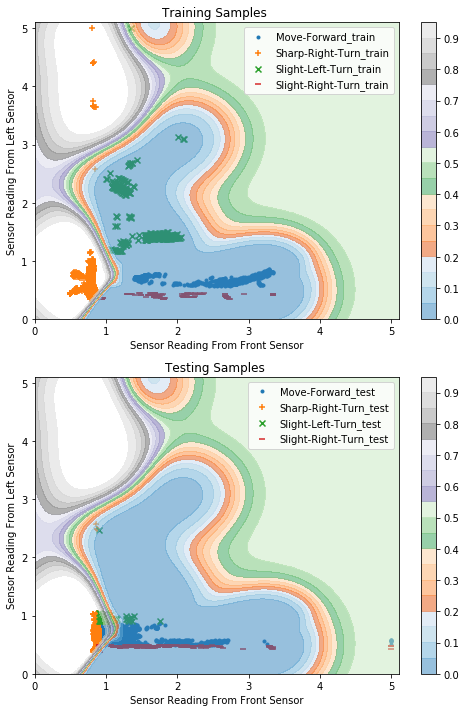

('Training set score: 0.999633', 2728)
('Test set score: 0.659699', 2727)


In [27]:
from sklearn.svm import SVC
file1=['./data/robot/2/','2.csv']

X_train, X_test, y_train, y_test = read_data(file1[0])
X=np.concatenate((X_train,X_test), axis=0)
y=np.concatenate((y_train,y_test), axis=0)
# X_train, X_test, y_train, y_test = \
#         train_test_split(X,y, test_size=0.2, random_state=1)  
svc=SVC(gamma=2, C=1,probability=True)

svc.fit(X_train, y_train)

label=mlp.classes_

figure = plt.figure(figsize=(7, 10))
h=0.05
x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() +.1
x2_min, x2_max =X.T[1].min() - .1, X.T[1].max() + .1
xx, yy = np.meshgrid(np.arange(x1_min-1, x1_max+1, h),np.arange(x2_min-1, x2_max+1, h))
cmap1 = plt.cm.RdBu
cmap2 = plt.cm.Set2
cmap3 = plt.cm.tab20c
i=1

ax = plt.subplot(2, 1, 1)
ax.set_title("Training Samples ")
ax.set_ylim(x2_min, x2_max)
ax.set_xlim(x1_min, x1_max)
ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
ax.set_xlabel('Sensor Reading From Front Sensor',size=10)
ax.set_ylabel('Sensor Reading From Left Sensor',size=10)

for j in range(0,len(label)):
    index=(y_train==label[j])
    ax.scatter(X_train[index].T[0], X_train[index].T[1],cmap=cmap1,marker=markers[j],label=label[j]+'_train')
    index=(y_test==label[j])
Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,i]
Z = Z.reshape(xx.shape)
cntr1 = ax.contourf(xx, yy, Z, levels=np.arange(0,1,0.05),cmap=cmap3, alpha=.5)
cbar0 = plt.colorbar( cntr1,)
plt.legend()

ax = plt.subplot(2, 1, 2)
ax.set_title("Testing Samples ")
ax.set_ylim(x2_min, x2_max)
ax.set_xlim(x1_min, x1_max)
ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
ax.set_xlabel('Sensor Reading From Front Sensor',size=10)
ax.set_ylabel('Sensor Reading From Left Sensor',size=10)
for j in range(0,len(label)):
    index=(y_test==label[j])
    ax.scatter(X_test[index].T[0], X_test[index].T[1],cmap=cmap1,marker=markers[j],label=label[j]+'_test')
Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,i]
Z = Z.reshape(xx.shape)
cntr1 = ax.contourf(xx, yy, Z, levels=np.arange(0,1,0.05),cmap=cmap3, alpha=.5)
cbar0 = plt.colorbar( cntr1,)

plt.legend()
plt.tight_layout()
plt.show()

print("Training set score: %f" % svc.score(X_train, y_train),len(y_train))

print("Test set score: %f" % svc.score(X_test, y_test),len(y_test))
